# Homework 2

## Task 1 – Dimensionality reduction

####  
Consider a classification problem where you have only two features (the data is on Moodle). You
decided to visualize the instances on a 2D feature space where the class information is color-coded.
The R code to obtain the plot below is already given to you and after running to code you obtained
Figure 3.

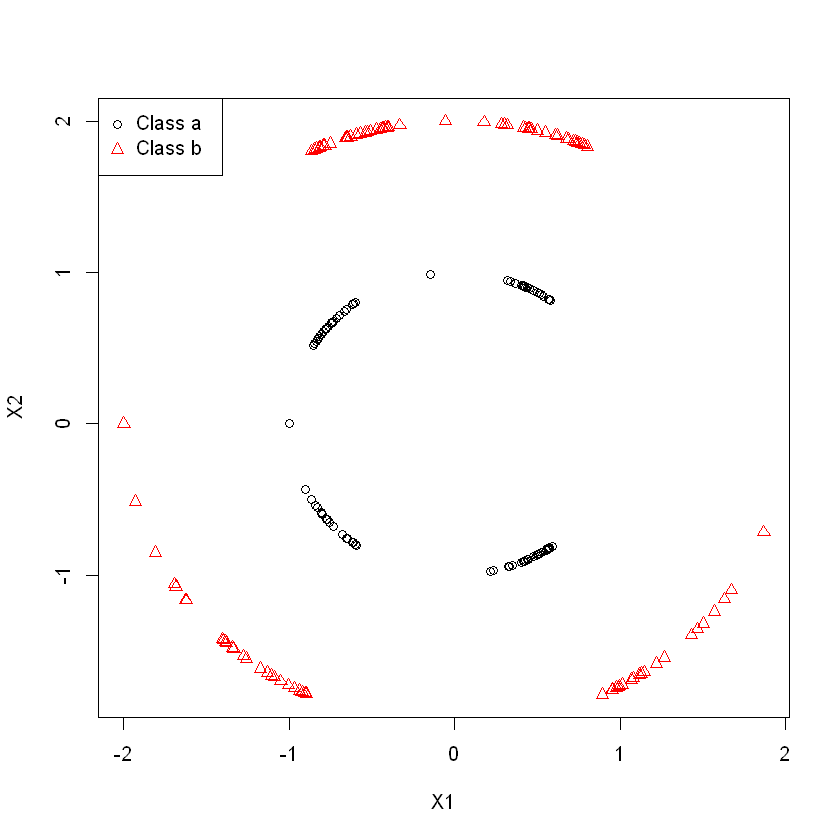

In [11]:
dat=read.csv('IE582_Fall21_HW2_q1_data.csv',header=T)
lev=as.numeric(dat[,3])
##Scatter Plot of the Features
plot(dat[,1],dat[,2],col=lev,pch=lev,xlab=names(dat)[1],ylab=names(dat)[2])
legend("topleft",paste("Class",levels(dat[,3])),col=unique(lev), pch= unique(lev))


#### a) Apply PCA to reduce the number of dimensions to one and visualize the instances on a scatter plot. Note that the scatter plot will show the observation number versus the observed value (as we have a single feature to represent the instance).

In [59]:
##Applying Principle Component Analysis
pca = princomp(dat[c(1,2)], cor=T)
summary(pca, loadings=T)

Importance of components:
                          Comp.1    Comp.2
Standard deviation     1.0004424 0.9995574
Proportion of Variance 0.5004425 0.4995575
Cumulative Proportion  0.5004425 1.0000000

Loadings:
   Comp.1 Comp.2
X1  0.707  0.707
X2  0.707 -0.707

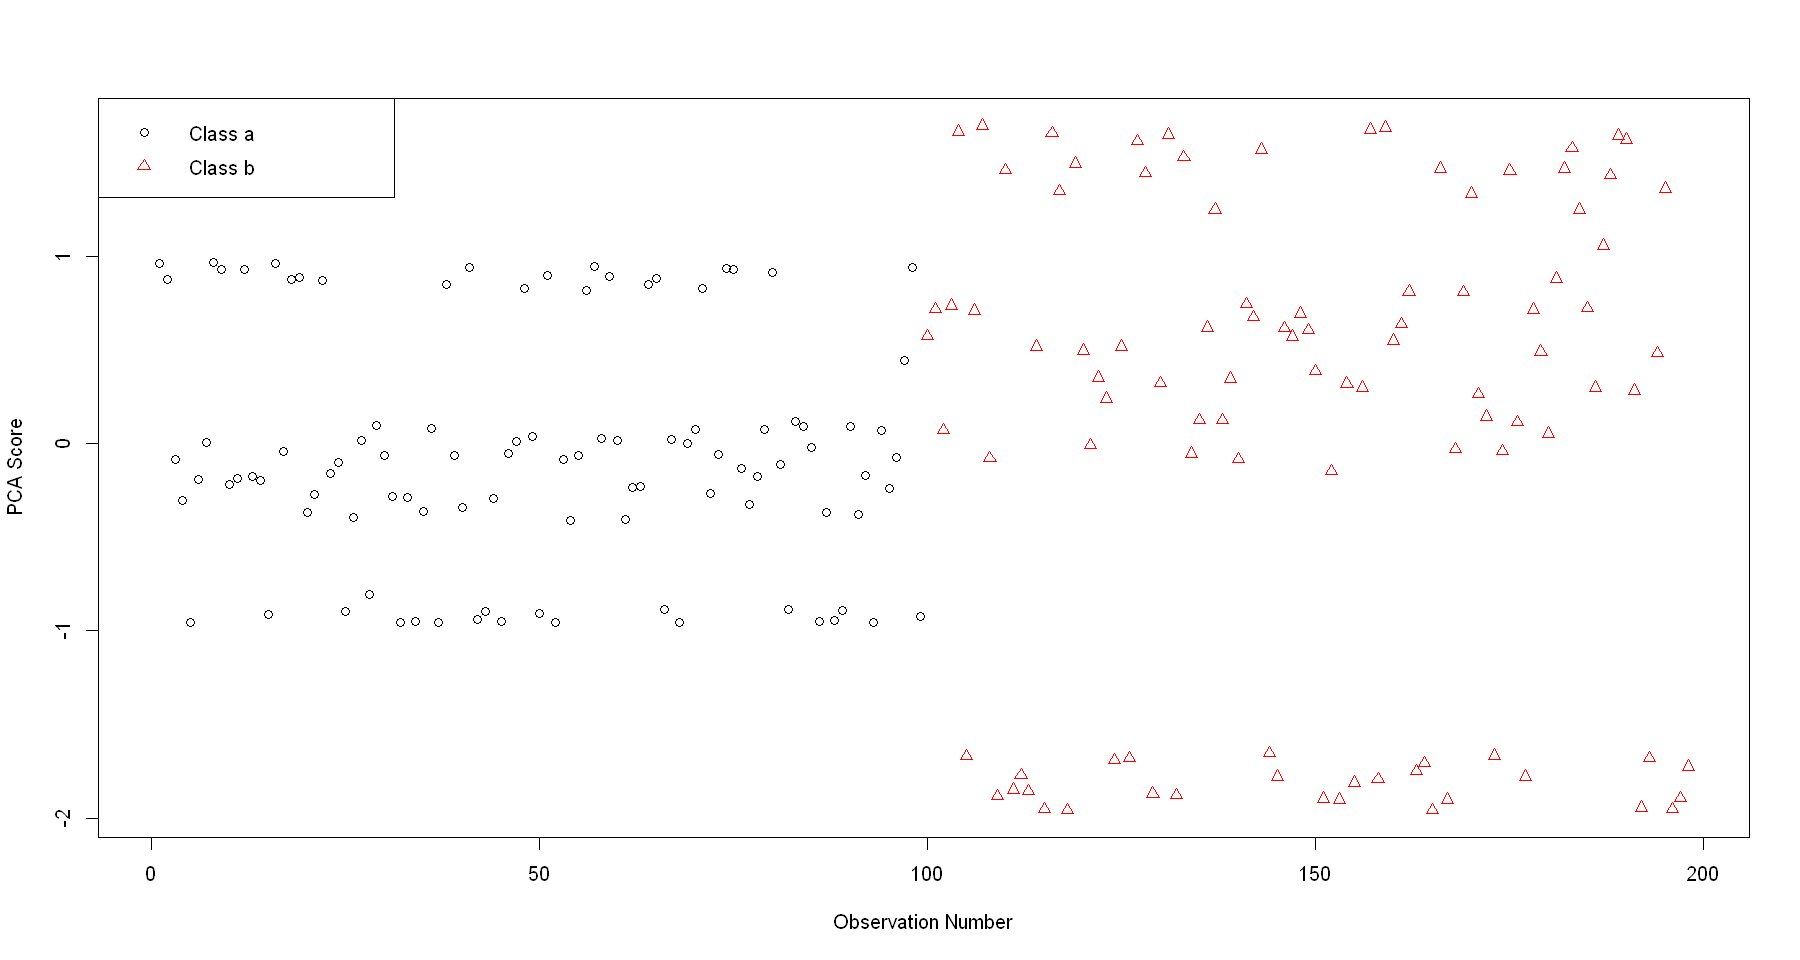

In [65]:
## PCA plot
plot(pca$scores[,1], col=dat$class, pch=as.numeric(dat$class), xlab="Observation Number", ylab="PCA Score")
legend("topleft", paste("Class",levels(dat[,3])),col=unique(lev),pch=unique(lev))

#### b) Apply MDS to reduce the number of dimensions to one and visualize the instances on a scatter plot as in part (a). Use at least two different similarity measure. 

Warning message in dist(dat, method = "euclidean"):
"Zorlamadan dolayı ortaya çıkan NAs"

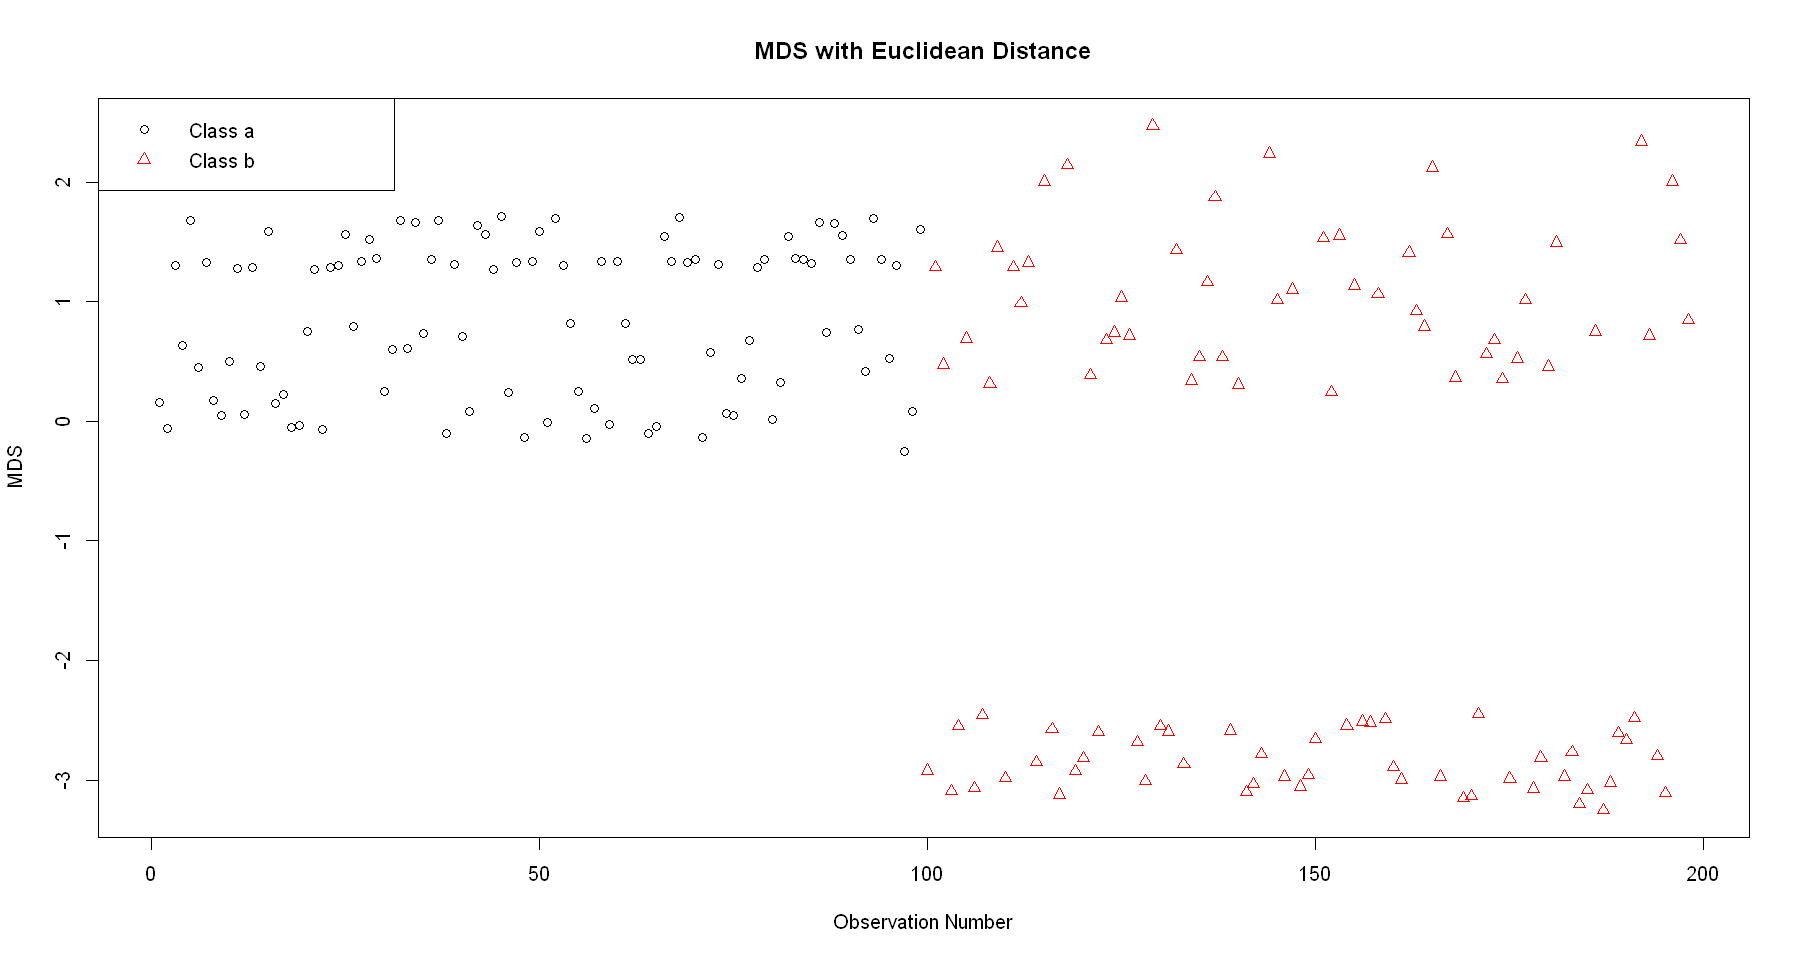

In [66]:
# Distance Matrix with Euclidean Method
d <- dist(dat, method="euclidean")  

# Applying MDS
mds_1 <- cmdscale(d, k=1)
plot(mds_1, col=dat$class, pch=as.numeric(dat$class), xlab="Observation Number", ylab="MDS", main="MDS with Euclidean Distance")
legend("topleft", paste("Class", levels(dat[,3])), col=unique(lev), pch=unique(lev))

Warning message in dist(dat, method = "manhattan"):
"Zorlamadan dolayı ortaya çıkan NAs"

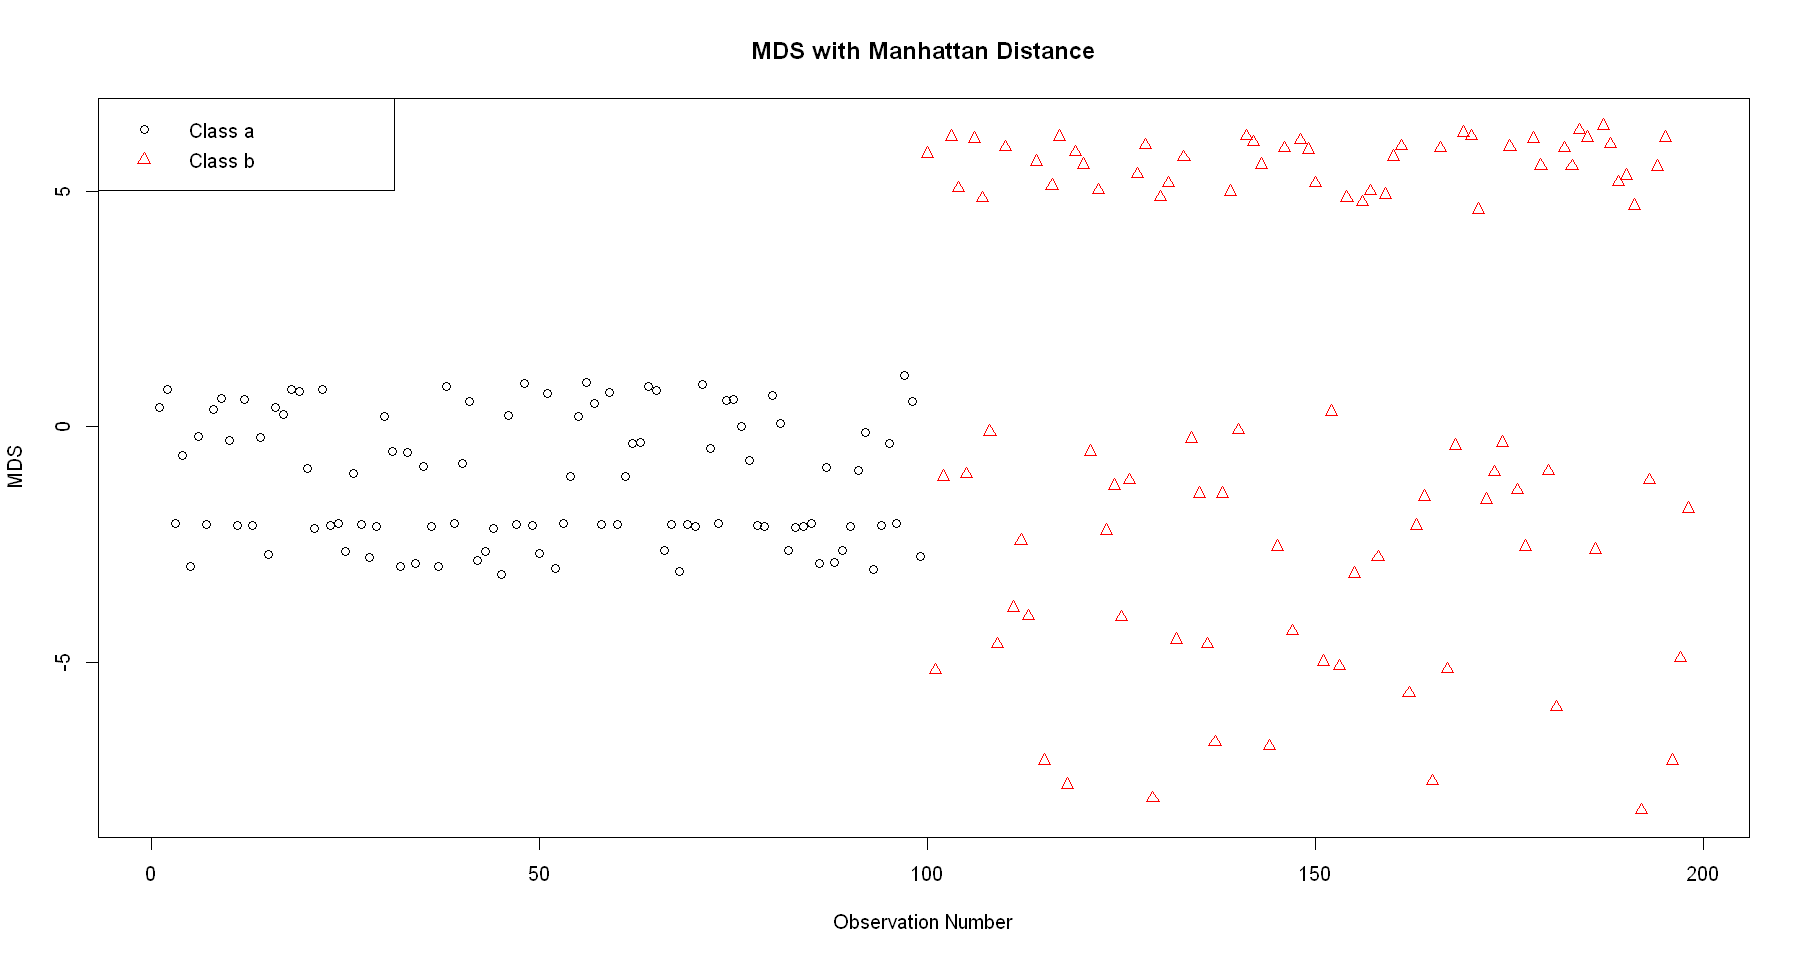

In [68]:
# Distance Matrix with Manhattan Method
d <- dist(dat, method="manhattan")  

# Applying MDS
mds_1 <- cmdscale(d, k=1)
plot(mds_1, col=dat$class, pch=as.numeric(dat$class), xlab="Observation Number", ylab="MDS", main="MDS with Manhattan Distance")
legend("topleft", paste("Class", levels(dat[,3])), col=unique(lev), pch=unique(lev))

#### c) On a 2D scatter plot, one can observe how two observations from two classes are different. 
1. What is your conclusion when you use PCA results in single dimension (your results from part a)?
1. For the observations in the middle, finding a good seperatiion may be hard. Here, we used PCA for a nonlinear relationship, so it may not be that accurate.

2. What is your conclusion when you use MDS results in single dimension (your results from part b)? Compare the results from different similarity measures used in part (b)
2. Apart from some of the observations, the data is as seperable enough. Feature obtained from both MDSs seems very good. Manhattan distance gave slightly better results because it creates distinctive clusters.

3. Compare MDS results with PCA. What is your conclusion?
3. I think, MDS works better when used in nonlinearity cases, PCA works better when used in linearity cases. Here, PCA did a worse job than MDS at reducing the dimension, because our case is a nonlinear one.


#### d) Suppose, you are not satisfied with your dimensionality reduction scheme in part (a). 
Add the
following columns to your data, X 1
2
, X2
2
, X 1× X 2 (three columns as functions of your
original variables) and apply PCA. Comment on the PCA results (i.e. what are the eigenvalues?
What do they refer to?).


In [69]:
dat$X12 <- dat$X1^2
dat$X22 <- dat$X2^2
dat$X1X2 <- dat$X1*dat$X2

In [70]:
pca = princomp(dat[c(1,2,4,5,6)], cor=T)
summary(pca, loadings=T)

Importance of components:
                          Comp.1    Comp.2    Comp.3    Comp.4     Comp.5
Standard deviation     1.3114557 1.1508988 0.9723549 0.7988684 0.60979578
Proportion of Variance 0.3439832 0.2649136 0.1890948 0.1276382 0.07437018
Cumulative Proportion  0.3439832 0.6088968 0.7979917 0.9256298 1.00000000

Loadings:
     Comp.1 Comp.2 Comp.3 Comp.4 Comp.5
X1    0.419  0.556  0.128  0.571  0.415
X2    0.538 -0.454        -0.368  0.600
X12  -0.539  0.162  0.578 -0.273  0.524
X22   0.351 -0.313  0.797  0.127 -0.356
X1X2 -0.348 -0.600         0.669  0.258

#### Each column refers to eigenvector and each component of eigenvector is corresponding eigenvalue.



## Task 2 – Reconstructing Turkey Map

#### 
Please download the intercity distance information from Karayolları Genel Müdürlüğü’s website from
the link below:
https://www.kgm.gov.tr/SiteCollectionDocuments/KGMdocuments/Root/Uzakliklar/ilmesafe.xls
Suppose we apply MDS to this data to distance matrix to obtain latent variables in 2D dimensional
space. Represent the new feature space on a 2D plot. You are expected to label each data point with the
respective city’s name. This plot should be similar to Turkey map. Are there any unusual observations?
If yes, comment on your findings.

In [39]:
##For reading Excel files
library(readxl)

In [40]:
##Creating the distance Matrix
distance_matrix = as.matrix(read_excel("ilmesafe.xls", skip=2))
distance_matrix = distance_matrix[,-1]
row.names(distance_matrix) = distance_matrix[, 1]
distance_matrix = distance_matrix[, -1]
distance_matrix =`class<-`(distance_matrix, 'numeric')
head(distance_matrix)

,ADANA,ADIYAMAN,AFYONKARAHİSAR,AĞRI,AMASYA,ANKARA,ANTALYA,ARTVİN,AYDIN,BALIKESİR,...,BATMAN,ŞIRNAK,BARTIN,ARDAHAN,IĞDIR,YALOVA,KARABÜK,KİLİS,OSMANİYE,DÜZCE
ADANA,NA,335,575,966,603,567,535,1035,874,903,...,621,709,782,1042,1066,899,714,246,87,735
ADIYAMAN,335,NA,910,648,632,814,870,751,1209,1238,...,303,471,1023,758,748,1147,955,210,248,976
AFYONKARAHİSAR,575,910,NA,1318,597,300,290,1243,345,328,...,1196,1284,515,1351,1461,338,447,821,662,375
AĞRI,966,648,1318,NA,738,1141,1428,396,1640,1569,...,369,430,1175,310,143,1363,1106,814,879,1192
AMASYA,603,632,597,736,NA,413,825,695,938,831,...,796,982,437,783,881,625,368,639,608,454
ANKARA,492,742,256,1054,333,NA,542,979,597,536,...,1001,1147,283,1087,1197,407,215,710,579,236


In [41]:
#Because it is a distance matrix, it should be symettric. We can make it symettric with below transformation.
distance_matrix[lower.tri(distance_matrix)] = t(distance_matrix)[lower.tri(distance_matrix)]
head(distance_matrix)

,ADANA,ADIYAMAN,AFYONKARAHİSAR,AĞRI,AMASYA,ANKARA,ANTALYA,ARTVİN,AYDIN,BALIKESİR,...,BATMAN,ŞIRNAK,BARTIN,ARDAHAN,IĞDIR,YALOVA,KARABÜK,KİLİS,OSMANİYE,DÜZCE
ADANA,NA,335,575,966,603,567,535,1035,874,903,...,621,709,782,1042,1066,899,714,246,87,735
ADIYAMAN,335,NA,910,648,632,814,870,751,1209,1238,...,303,471,1023,758,748,1147,955,210,248,976
AFYONKARAHİSAR,575,910,NA,1318,597,300,290,1243,345,328,...,1196,1284,515,1351,1461,338,447,821,662,375
AĞRI,966,648,1318,NA,738,1141,1428,396,1640,1569,...,369,430,1175,310,143,1363,1106,814,879,1192
AMASYA,603,632,597,738,NA,413,825,695,938,831,...,796,982,437,783,881,625,368,639,608,454
ANKARA,567,814,300,1141,413,NA,542,979,597,536,...,1001,1147,283,1087,1197,407,215,710,579,236


In [42]:
# Applying MDS
distance_matrix[is.na(distance_matrix)] = 0
d <- cmdscale(distance_matrix, eig = TRUE, k = 2)

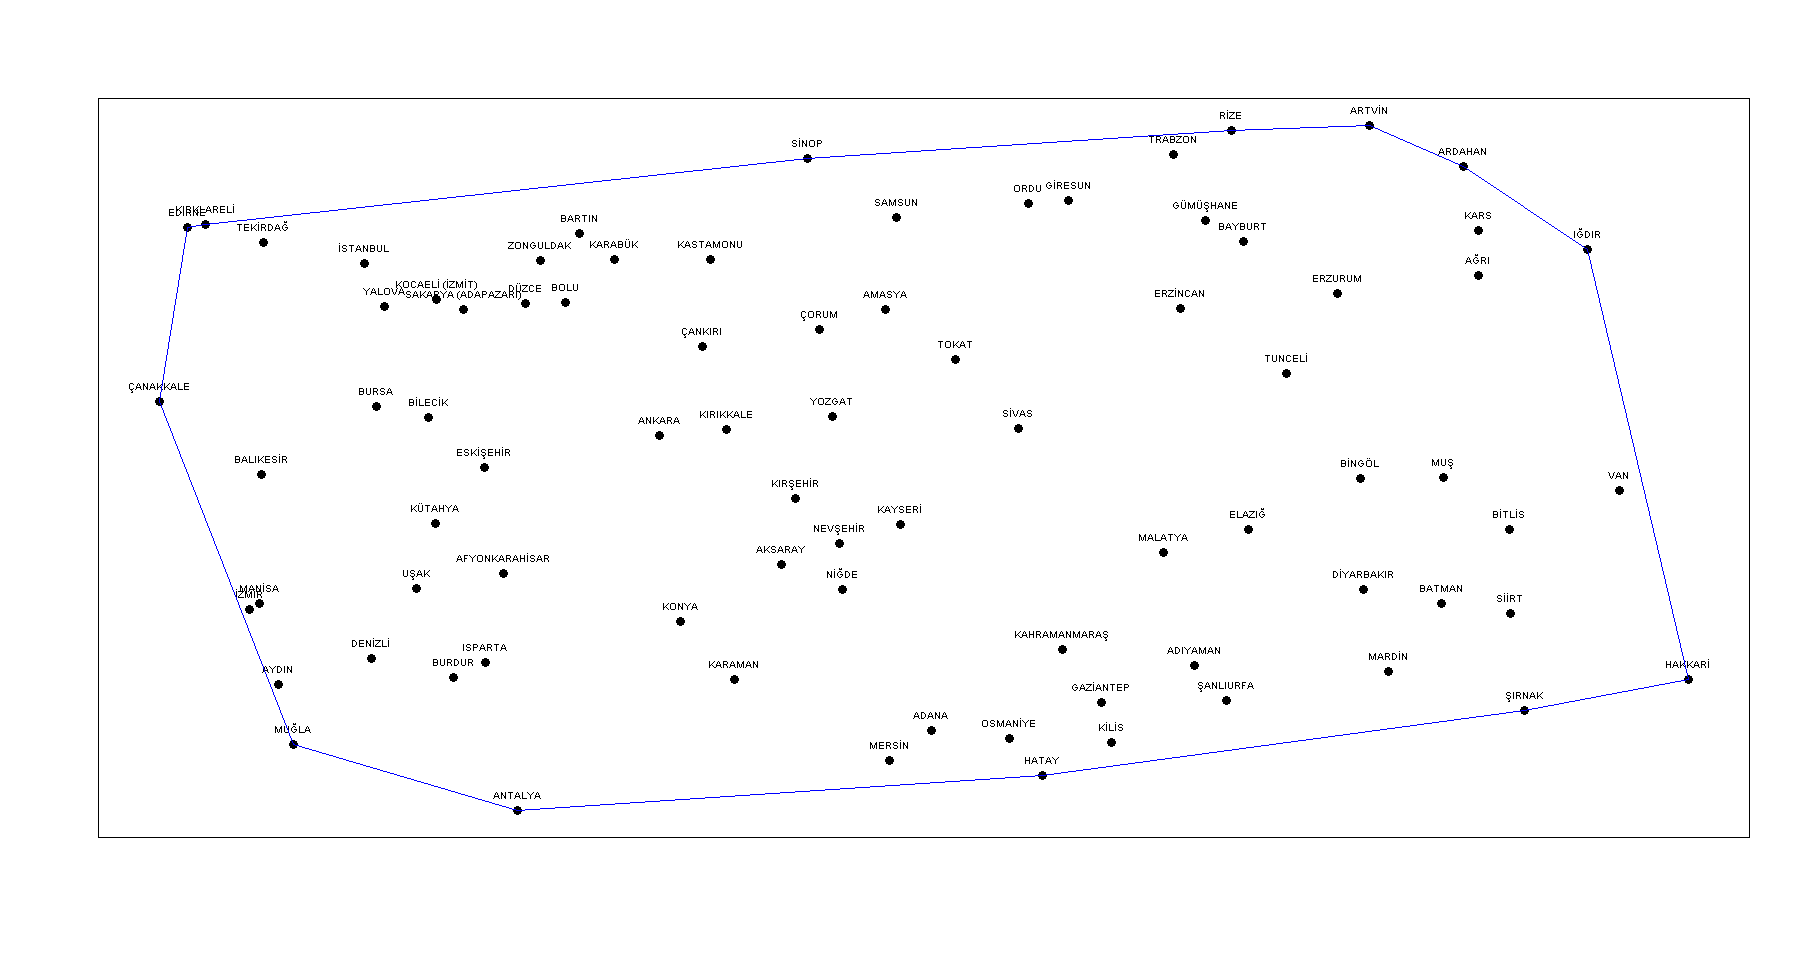

In [43]:
Plot_ConvexHull<-function(xcoord, ycoord, lcolor){
hpts = chull(x = xcoord, y = ycoord)
hpts = c(hpts, hpts[1])
lines(xcoord[hpts], ycoord[hpts], col = lcolor)
}

xrange = range(c(d$points[, 1]))
yrange = range(c(d$points[, 2]))

par(tck = 0.02, mgp = c(1.7, 0.3, 0))

# draw locations
plot(d$points[, 1], d$points[, 2], type = "p", pch = 19, col = "black", xaxt = "n", yaxt = "n", xlab = "", ylab = "", xlim = c(xrange), ylim = c(yrange))
city.names = colnames(distance_matrix)
text(x=d$points[, 1], y=d$points[, 2], pos = 3, labels = city.names, cex=0.5)

# draw borders
Plot_ConvexHull(xcoord = d$points[, 1], ycoord = d$points[, 2], lcolor = "blue")

## Task 3 – Dimensionality reduction for time series data

#### The dataset is provided in the following link:
https://drive.google.com/drive/u/1/folders/13553neknux7U8why55KM1WrjgkA9IJKm
Note that there are separate files for each axis and each row corresponds to one gesture in the files.
First column has the class information. The information between second and last column is the time
ordered observations in the corresponding axis (provided in the file name as X, Y or Z). Moreover, the
data is split into training and test sets. For now, you are expected to work with only the training series.
Hence, following files are to be used:

• uWaveGestureLibrary_X_TRAIN,

• uWaveGestureLibrary_Y_TRAIN,

• uWaveGestureLibrary_Z_TRAIN


In [82]:
library(data.table)


current_folder = getwd()

file_names = list.files(pattern = "uWaveGestureLibrary")
list_files = lapply(file_names, read.table)

list_files = lapply(seq_along(list_files), function(x) {
  list_files[[x]]$V0 = 1:nrow(list_files[[x]]) # column VO is created to specify the sample instance
  list_files[[x]]
})

ERROR: Error in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, : line 2 did not have 2 elements


In [83]:
x = as.data.table(list_files[1])
y = as.data.table(list_files[2])
z = as.data.table(list_files[3])

    
# Melting X coordinates 
setnames(x,"V1","class")
setnames(x,"V0","instance")
x = melt(x,id.vars=c('class','instance'))
x[,time:=as.numeric(gsub("\\D", "", variable))-1]
x = x[,list(class,instance, time, value)]
x = x[order(instance, class,time)]
setnames(x, "value", "x_cordinate")


# Melting Y coordinates
setnames(y,"V1","class")
setnames(y,"V0","instance")
y = melt(y,id.vars=c('class','instance'))
y[,time:=as.numeric(gsub("\\D", "", variable))-1]
y = y[,list(class,instance, time, value)]
y = y[order(instance, class, time)]
setnames(y, "value", "y_cordinate")

# Melting Z coordinates
setnames(z,"V1","class")
setnames(z,"V0","instance")
z = melt(z,id.vars=c('class','instance'))
z[,time:=as.numeric(gsub("\\D", "", variable))-1]
z = z[,list(class, instance, time, value)]
z = z[order(instance, class, time)]
setnames(z, "value", "z_cordinate")


xy = merge(x,
            y,
            by=c("class","instance","time"))
            

xyz = merge(xy,
            z,
            by=c("class","instance","time"))

In [84]:
head(xyz)

class,instance,time,x_cordinate,y_cordinate,z_cordinate
1,11,1,-0.7914472,-1.959984,-0.2490781
1,11,2,-0.7914472,-1.959984,-0.2490781
1,11,3,-0.7958727,-1.956600,-0.2514390
1,11,4,-0.8100650,-1.945750,-0.2590101
1,11,5,-0.8492300,-1.915809,-0.2799033
1,11,6,-0.9034648,-1.874347,-0.3088358


####  
a) Read the data and visualize one instance (all axes) from each class and try to relate the shape (time
series) you see with the gestures shown in Figure 1 (this is just for fun, sometimes it is good to start
with data visualization to understand what is going on). A 3D scatter plot would be interesting. Note
that this is an acceleration information. You can transform this information to a velocity vector by
computing the cumulative sum of acceleration over time. A cumulative sum operation on the velocity
values will transform the series to a position information.


In [86]:
library(lattice)

In [87]:
# instances belong to classes 1, 2, 3, 4, 5, 6, 7, 8 
samples <- xyz[instance %in% c(11, 15, 4, 5, 2, 1, 7, 6),]

In [88]:
velocity_samples = samples[, list(x_cordinate=cumsum(x_cordinate),
                                  y_cordinate=cumsum(y_cordinate),
                                  z_cordinate=cumsum(z_cordinate)), list(class, instance)]

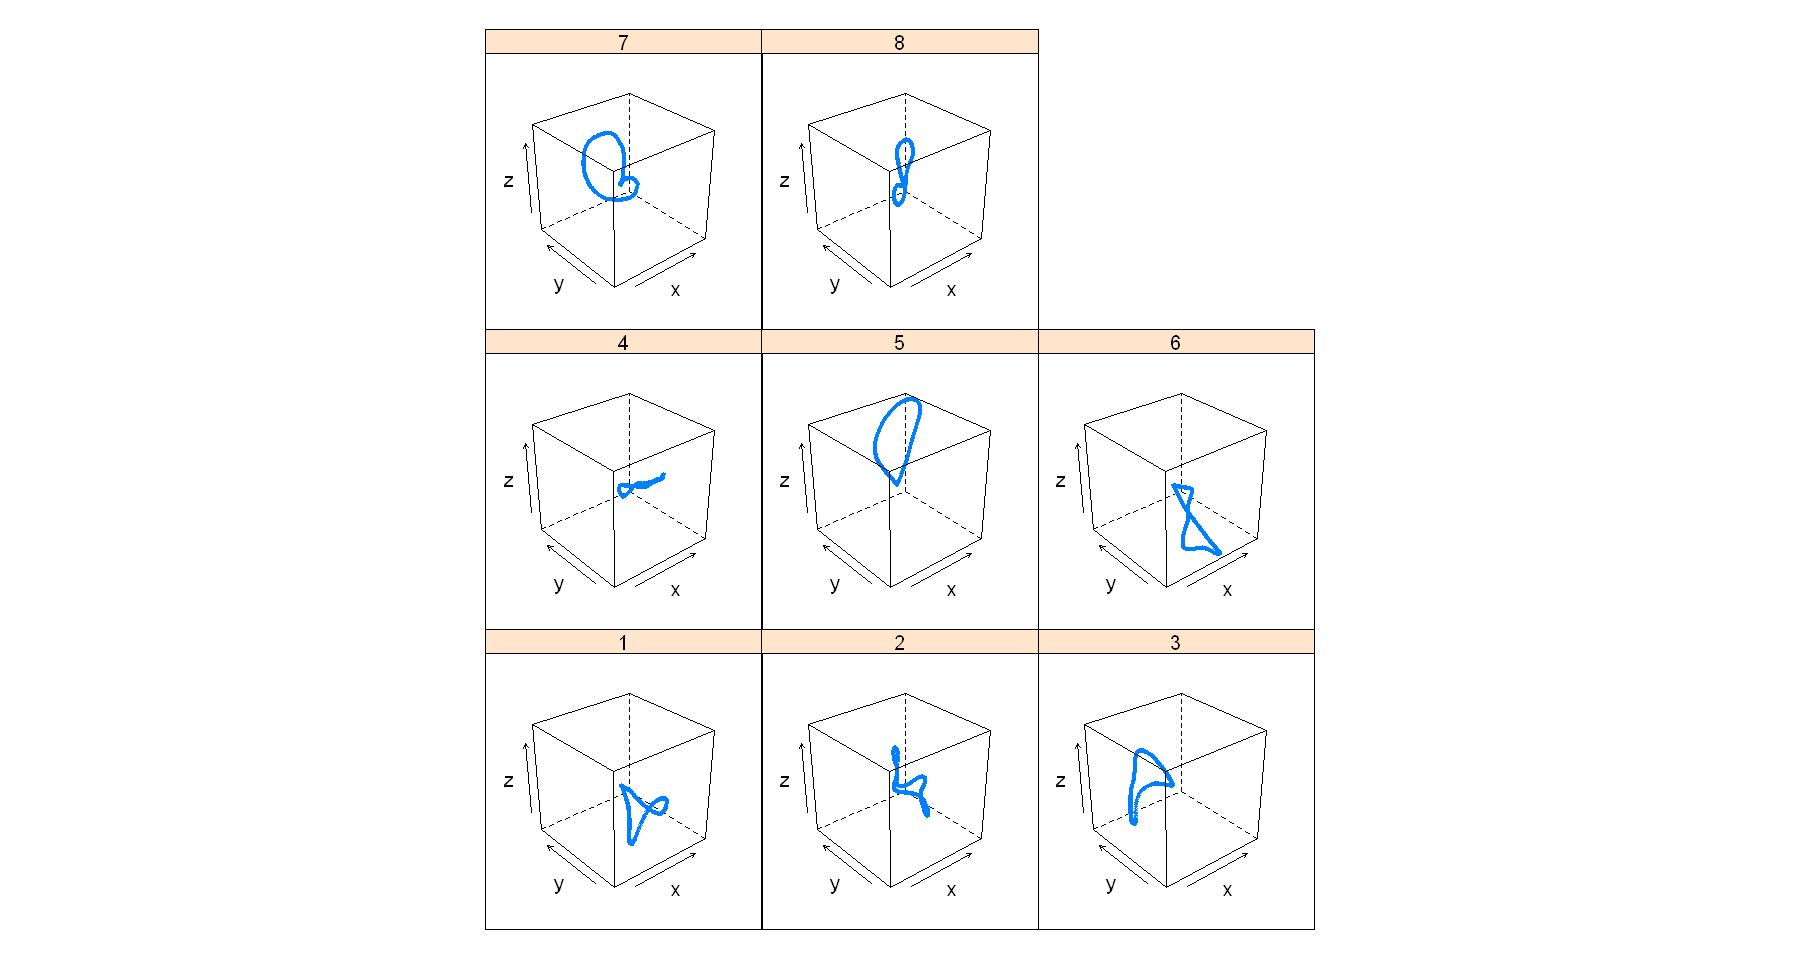

In [89]:
cloud(z_cordinate~x_cordinate*y_cordinate|as.factor(class), data=velocity_samples, xlab="x", ylab="y", zlab="z")

####  b) As you may have noticed, the data is provided as a regular data matrix (i.e. each row represents an instance and columns represent the time index of the observations). 
Assume that X, Y and Z variables
are concatenated to obtain a single time series in an unusual way as follows:
concatenated series = [x1 x2 …. xT y1 y2 …. yT z1 z2 …. zT ]
In other words, the information from X, Y and Z axis are concatenated to obtain a single series of
length 3T (each axis is represented by a time series of length T).
Apply PCA to the time series from each class in the training data. You are expected to filter the data
from each class and apply PCA to the representation. Work on the following questions based on your
PCA application for the time series from each class.

In [90]:
x = as.data.table(list_files[1])
x = x[,-317]
colnames(x) = paste0("X", as.numeric(gsub("V", "", colnames(x)))-1)
setnames(x, "X0", "class")

y = as.data.table(list_files[2])
y = y[,-317]
colnames(y) = paste0("Y", as.numeric(gsub("V", "", colnames(y)))-1)
y = y[,-1]

z = as.data.table(list_files[3])
z = z[,-317]
colnames(z) = paste0("Z", as.numeric(gsub("V", "", colnames(z)))-1)
z = z[,-1]

xyz = cbind(x, y, z)

In [91]:
head(xyz)

class,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,Z306,Z307,Z308,Z309,Z310,Z311,Z312,Z313,Z314,Z315
6,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,...,0.5232168,0.5139944,0.50348075,0.49296714,0.47452222,0.4560773,0.4376324,0.4191875,0.4007426,0.3822976
5,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,...,-0.4270104,-0.4270104,-0.42701043,-0.42717222,-0.42877307,-0.4407199,-0.4526667,-0.4646135,-0.4765603,-0.4885071
5,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,...,-0.8627172,-0.8627172,-0.86271720,-0.86271720,-0.86271720,-0.8627172,-0.8627172,-0.8627172,-0.8627172,-0.8627172
3,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,...,-0.1873845,-0.1235489,-0.05587047,0.01180812,0.07948656,0.1570561,0.2537396,0.4455027,0.6485381,0.8515735
4,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,...,1.8674725,1.8343190,1.75599960,1.63858220,1.52116390,1.4532661,1.5152189,1.6326367,1.7500543,1.8674725
8,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,...,0.6979770,0.6654623,0.63294758,0.60043289,0.55859021,0.5167475,0.4679755,0.4192035,0.3704314,0.3216594


### 1

In [92]:
pca1 = prcomp(xyz[class==1,-c(1, 946)])
summary(pca1)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     9.9395 8.4482 6.59507 6.44782 5.59197 5.43668 5.04443
Proportion of Variance 0.2069 0.1494 0.09108 0.08705 0.06548 0.06189 0.05328
Cumulative Proportion  0.2069 0.3563 0.44739 0.53444 0.59992 0.66181 0.71510
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     4.05127 3.84269 3.22526 3.11405 2.86242 2.73875 2.67252
Proportion of Variance 0.03437 0.03092 0.02178 0.02031 0.01716 0.01571 0.01496
Cumulative Proportion  0.74946 0.78038 0.80216 0.82247 0.83963 0.85533 0.87029
                          PC15    PC16    PC17    PC18    PC19    PC20   PC21
Standard deviation     2.52453 2.34745 2.20371 2.12927 2.09806 1.96238 1.8016
Proportion of Variance 0.01335 0.01154 0.01017 0.00949 0.00922 0.00806 0.0068
Cumulative Proportion  0.88363 0.89517 0.90534 0.91483 0.92405 0.93211 0.9389
                          PC22    PC23

### 2

In [93]:
pca2 = prcomp(xyz[class==2,-c(1, 946)])
summary(pca2)

Importance of components:
                           PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     12.4528 7.7827 5.44487 5.08123 4.78668 4.48843 3.96099
Proportion of Variance  0.3195 0.1248 0.06108 0.05319 0.04721 0.04151 0.03232
Cumulative Proportion   0.3195 0.4443 0.50537 0.55857 0.60577 0.64728 0.67960
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     3.54675 3.46056 3.43511 3.20379 3.11985 2.76688 2.61842
Proportion of Variance 0.02592 0.02467 0.02431 0.02115 0.02005 0.01577 0.01413
Cumulative Proportion  0.70552 0.73019 0.75451 0.77565 0.79571 0.81148 0.82561
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     2.55351 2.34922 2.22615 2.13052 2.02491 2.01218 1.95272
Proportion of Variance 0.01343 0.01137 0.01021 0.00935 0.00845 0.00834 0.00786
Cumulative Proportion  0.83904 0.85041 0.86062 0.86997 0.87842 0.88676 0.89462
                          PC22

### 3

In [94]:
pca3 = prcomp(xyz[class==3,-c(1, 946)])
summary(pca3)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     13.242 8.1270 7.7056 6.98853 6.50201 5.79366 4.68589
Proportion of Variance  0.296 0.1115 0.1003 0.08246 0.07138 0.05668 0.03707
Cumulative Proportion   0.296 0.4076 0.5078 0.59029 0.66167 0.71834 0.75542
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     4.03936 3.95515 3.41633 3.23088 2.82085 2.77628 2.64724
Proportion of Variance 0.02755 0.02641 0.01971 0.01762 0.01344 0.01301 0.01183
Cumulative Proportion  0.78297 0.80938 0.82908 0.84671 0.86014 0.87316 0.88499
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     2.55562 2.38373 2.32855 2.19465 2.02477 1.96573 1.93424
Proportion of Variance 0.01103 0.00959 0.00915 0.00813 0.00692 0.00652 0.00632
Cumulative Proportion  0.89602 0.90561 0.91477 0.92290 0.92982 0.93635 0.94266
                          PC22    PC23

### 4

In [95]:
pca4 = prcomp(xyz[class==4,-c(1, 946)])
summary(pca4)

Importance of components:
                           PC1     PC2     PC3    PC4     PC5     PC6     PC7
Standard deviation     11.1939 10.0504 7.48753 7.0944 6.45253 5.51051 5.12400
Proportion of Variance  0.2154  0.1736 0.09635 0.0865 0.07156 0.05219 0.04512
Cumulative Proportion   0.2154  0.3890 0.48532 0.5718 0.64338 0.69557 0.74069
                          PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     4.2123 3.84966 3.32070 3.29288 3.09669 3.01362 2.66014
Proportion of Variance 0.0305 0.02547 0.01895 0.01864 0.01648 0.01561 0.01216
Cumulative Proportion  0.7712 0.79666 0.81561 0.83424 0.85073 0.86633 0.87850
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     2.48733 2.44627 2.31114 2.26498 2.14628 1.98295 1.91763
Proportion of Variance 0.01063 0.01028 0.00918 0.00882 0.00792 0.00676 0.00632
Cumulative Proportion  0.88913 0.89941 0.90859 0.91741 0.92533 0.93209 0.93841
                          PC22    

### 5

In [96]:
pca5 = prcomp(xyz[class==5,-c(1, 946)])
summary(pca5)

Importance of components:
                           PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     11.0463 10.4859 5.96054 5.51262 4.83500 4.48335 3.91170
Proportion of Variance  0.2591  0.2335 0.07544 0.06452 0.04964 0.04268 0.03249
Cumulative Proportion   0.2591  0.4925 0.56798 0.63251 0.68214 0.72482 0.75731
                           PC8     PC9    PC10    PC11   PC12    PC13    PC14
Standard deviation     3.40613 3.37438 3.16897 3.01290 2.8876 2.65895 2.56010
Proportion of Variance 0.02463 0.02418 0.02132 0.01927 0.0177 0.01501 0.01392
Cumulative Proportion  0.78195 0.80612 0.82745 0.84672 0.8644 0.87944 0.89335
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     2.46634 2.44422 2.20514 1.88669 1.79230 1.71454 1.62917
Proportion of Variance 0.01292 0.01268 0.01032 0.00756 0.00682 0.00624 0.00564
Cumulative Proportion  0.90627 0.91895 0.92928 0.93684 0.94366 0.94990 0.95553
                          PC22

### 6

In [97]:
pca6 = prcomp(xyz[class==6,-c(1, 946)])
summary(pca6)

Importance of components:
                           PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     13.8666 9.9401 8.9934 6.46485 6.15109 5.08449 5.01137
Proportion of Variance  0.2773 0.1425 0.1167 0.06028 0.05457 0.03728 0.03622
Cumulative Proportion   0.2773 0.4198 0.5365 0.59674 0.65131 0.68859 0.72481
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     4.90447 4.52709 3.86752 3.61731 3.42149 3.33189 3.01991
Proportion of Variance 0.03469 0.02956 0.02157 0.01887 0.01688 0.01601 0.01315
Cumulative Proportion  0.75950 0.78906 0.81063 0.82950 0.84639 0.86240 0.87555
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     2.97545 2.66925 2.48831 2.42364 2.33101 2.27363 2.14091
Proportion of Variance 0.01277 0.01028 0.00893 0.00847 0.00784 0.00746 0.00661
Cumulative Proportion  0.88832 0.89859 0.90752 0.91600 0.92383 0.93129 0.93790
                          PC22    

### 7

In [98]:
pca7 = prcomp(xyz[class==7,-c(1, 946)])
summary(pca7)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     12.613 9.0264 7.9184 6.36664 5.14947 4.48668 3.79466
Proportion of Variance  0.304 0.1557 0.1198 0.07745 0.05067 0.03846 0.02751
Cumulative Proportion   0.304 0.4597 0.5795 0.65691 0.70758 0.74604 0.77356
                           PC8     PC9   PC10   PC11    PC12   PC13    PC14
Standard deviation     3.67803 3.45571 3.1369 2.7451 2.50272 2.4206 2.23278
Proportion of Variance 0.02585 0.02282 0.0188 0.0144 0.01197 0.0112 0.00953
Cumulative Proportion  0.79941 0.82222 0.8410 0.8554 0.86739 0.8786 0.88812
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     2.15042 1.99342 1.90703 1.79321 1.73913 1.62362 1.60417
Proportion of Variance 0.00884 0.00759 0.00695 0.00614 0.00578 0.00504 0.00492
Cumulative Proportion  0.89695 0.90454 0.91149 0.91764 0.92342 0.92845 0.93337
                          PC22    PC23    PC24    

### 8

In [99]:
pca8 = prcomp(xyz[class==8,-c(1, 946)])
summary(pca8)

Importance of components:
                           PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     16.0261 10.4748 6.78474 5.48437 4.40234 4.07291 4.03099
Proportion of Variance  0.4361  0.1863 0.07817 0.05107 0.03291 0.02817 0.02759
Cumulative Proportion   0.4361  0.6224 0.70060 0.75168 0.78459 0.81276 0.84035
                           PC8     PC9    PC10    PC11    PC12   PC13    PC14
Standard deviation     3.25056 3.11609 2.72032 2.50508 2.41708 2.2641 2.12559
Proportion of Variance 0.01794 0.01649 0.01257 0.01066 0.00992 0.0087 0.00767
Cumulative Proportion  0.85829 0.87478 0.88735 0.89800 0.90792 0.9166 0.92430
                          PC15   PC16    PC17    PC18   PC19    PC20    PC21
Standard deviation     1.95179 1.9112 1.84604 1.71080 1.6453 1.56543 1.47990
Proportion of Variance 0.00647 0.0062 0.00579 0.00497 0.0046 0.00416 0.00372
Cumulative Proportion  0.93077 0.9370 0.94276 0.94773 0.9523 0.95649 0.96020
                          PC22    PC23

In [100]:
pca1_rot=as.data.table(t(pca1$rotation[,c(1,2)]))
pca1_rot[,eigenvector:=c("PC1", "PC2")]
pca1_rot[,class:=1]

pca2_rot=as.data.table(t(pca2$rotation[,c(1,2)]))
pca2_rot[,eigenvector:=c("PC1", "PC2")]
pca2_rot[,class:=2]

pca3_rot=as.data.table(t(pca3$rotation[,c(1,2)]))
pca3_rot[,eigenvector:=c("PC1", "PC2")]
pca3_rot[,class:=3]

pca4_rot=as.data.table(t(pca4$rotation[,c(1,2)]))
pca4_rot[,eigenvector:=c("PC1", "PC2")]
pca4_rot[,class:=4]

pca5_rot=as.data.table(t(pca5$rotation[,c(1,2)]))
pca5_rot[,eigenvector:=c("PC1", "PC2")]
pca5_rot[,class:=5]

pca6_rot=as.data.table(t(pca6$rotation[,c(1,2)]))
pca6_rot[,eigenvector:=c("PC1", "PC2")]
pca6_rot[,class:=6]

pca7_rot=as.data.table(t(pca7$rotation[,c(1,2)]))
pca7_rot[,eigenvector:=c("PC1", "PC2")]
pca7_rot[,class:=7]

pca8_rot=as.data.table(t(pca8$rotation[,c(1,2)]))
pca8_rot[,eigenvector:=c("PC1", "PC2")]
pca8_rot[,class:=8]

rotations = rbind(pca1_rot, pca2_rot, pca3_rot, pca4_rot, pca5_rot, pca6_rot, pca7_rot, pca8_rot)


In [101]:
rotations_melt = melt(rotations, id.vars=c('class','eigenvector'))
rotations_melt = rotations_melt[,list(time=1:.N,
                                      value=value), list(class, eigenvector)]
rotations_melt = rotations_melt[order(class,eigenvector, time)]

In [105]:
head(rotations_melt[class==1&eigenvector=="PC1", ])

class,eigenvector,time,value
1,PC1,1,0.04709672
1,PC1,2,0.04692090
1,PC1,3,0.04674805
1,PC1,4,0.04662229
1,PC1,5,0.04655796
1,PC1,6,0.04655709


In [107]:
library(ggplot2)
library(repr)

options(repr.plot.width=15, repr.plot.height=8)

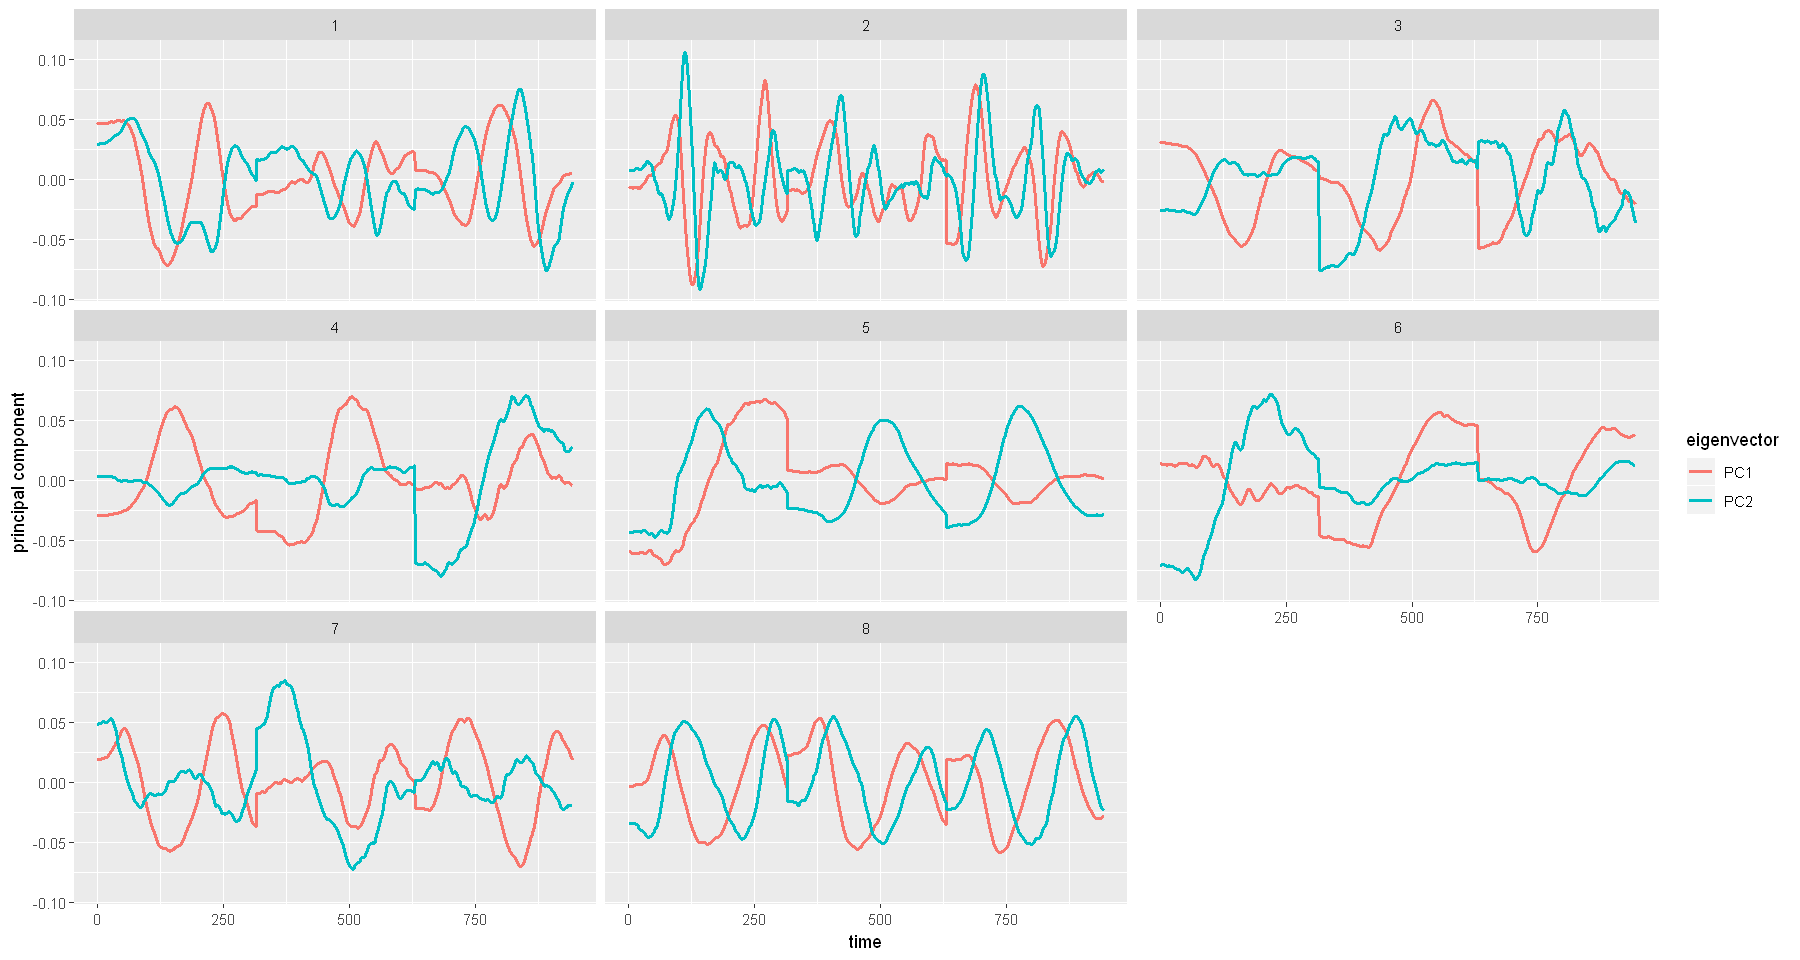

In [108]:
ggplot(rotations_melt, aes(x=time, y=value, color=eigenvector)) +  geom_line(size=1) + facet_wrap(~class) + ylab("principal component")